<a href="https://colab.research.google.com/github/Keita062/work/blob/main/(12.04)%E9%87%8D%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90%E3%81%AE%E5%88%9D%E6%AD%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
from matplotlib.colors import LinearSegmentedColormap

In [3]:
df = pd.read_csv('SSDSE-B-2024.csv',encoding="shift_jis",header=1)
Data = pd.DataFrame(df)

translation_dict = {
    '北海道': 'Hokkaido',
    '青森県': 'Aomori',
    '岩手県': 'Iwate',
    '宮城県': 'Miyagi',
    '秋田県': 'Akita',
    '山形県': 'Yamagata',
    '福島県': 'Fukushima',
    '茨城県': 'Ibaraki',
    '栃木県': 'Tochigi',
    '群馬県': 'Gunma',
    '埼玉県': 'Saitama',
    '千葉県': 'Chiba',
    '東京都': 'Tokyo',
    '神奈川県': 'Kanagawa',
    '新潟県': 'Niigata',
    '富山県': 'Toyama',
    '石川県': 'Ishikawa',
    '福井県': 'Fukui',
    '山梨県': 'Yamanashi',
    '長野県': 'Nagano',
    '岐阜県': 'Gifu',
    '静岡県': 'Shizuoka',
    '愛知県': 'Aichi',
    '三重県': 'Mie',
    '滋賀県': 'Shiga',
    '京都府': 'Kyoto',
    '大阪府': 'Osaka',
    '兵庫県': 'Hyogo',
    '奈良県': 'Nara',
    '和歌山県': 'Wakayama',
    '鳥取県': 'Tottori',
    '島根県': 'Shimane',
    '岡山県': 'Okayama',
    '広島県': 'Hiroshima',
    '山口県': 'Yamaguchi',
    '徳島県': 'Tokushima',
    '香川県': 'Kagawa',
    '愛媛県': 'Ehime',
    '高知県': 'Kochi',
    '福岡県': 'Fukuoka',
    '佐賀県': 'Saga',
    '長崎県': 'Nagasaki',
    '熊本県': 'Kumamoto',
    '大分県': 'Oita',
    '宮崎県': 'Miyazaki',
    '鹿児島県': 'Kagoshima',
    '沖縄県': 'Okinawa'
}

# 日本語を英語に変換
Data['都道府県'] = Data['都道府県'].replace(translation_dict)

# 対応する英語の列名リスト
english_columns = [
    'Year', 'Region Code', 'Prefecture', 'Total Population', 'Male Population', 'Female Population',
    'Japanese Population', 'Male Japanese Population', 'Female Japanese Population', 'Under 15 Population',
    'Under 15 Male Population', 'Under 15 Female Population', '15-64 Population', '15-64 Male Population',
    '15-64 Female Population', 'Over 65 Population', 'Over 65 Male Population', 'Over 65 Female Population',
    'Birth Count', 'Male Birth Count', 'Female Birth Count', 'Total Fertility Rate', 'Death Count', 'Male Death Count',
    'Female Death Count', 'Immigrant Count (Japanese Migrants)', 'Male Immigrant Count (Japanese Migrants)',
    'Female Immigrant Count (Japanese Migrants)', 'Emigrant Count (Japanese Migrants)', 'Male Emigrant Count (Japanese Migrants)',
    'Female Emigrant Count (Japanese Migrants)', 'Marriage Count', 'Divorce Count', 'Average Yearly Temperature',
    'Max Temperature (Max Monthly Average)', 'Min Temperature (Min Monthly Average)', 'Annual Precipitation Days',
    'Annual Precipitation', 'New Building Construction Count', 'New Building Floor Area', 'Hotel and Ryokan Facilities Count',
    'Hotel and Ryokan Room Count', 'Standard Price (Residential Land)', 'Standard Price (Commercial Land)', 'Kindergarten Count',
    'Kindergarten Teacher Count', 'Kindergarten Enrollment Count', 'Elementary School Count', 'Elementary School Teacher Count',
    'Elementary School Student Count', 'Junior High School Count', 'Junior High School Teacher Count', 'Junior High School Student Count',
    'Junior High School Graduates Count', 'Junior High School Graduates Who Continue Education Count', 'High School Count',
    'High School Teacher Count', 'High School Student Count', 'High School Graduates Count', 'High School Graduates Who Continue Education Count',
    'Junior College Count', 'University Count', 'Junior College Teacher Count', 'University Teacher Count', 'Junior College Student Count',
    'University Student Count', 'Junior College Graduates Count', 'Junior College Graduates Who Continue Education Count',
    'University Graduates Count', 'University Graduates Who Continue Education Count', 'Vocational School Count', 'Miscellaneous School Count',
    'Vocational School Student Count', 'Miscellaneous School Student Count', 'New Job Application Count (General)', 'Monthly Valid Job Seeker Count (General)',
    'Monthly Valid Job Openings Count (General)', 'Job Fulfillment Rate (General)', 'Job Placement Count (General)', 'Passport Issuance Count',
    'Total Accommodation Count', 'Foreign Total Accommodation Count', 'New Housing Start Count', 'New Owner-Occupied Housing Start Count',
    'New Rental Housing Start Count', 'New Condominium Housing Start Count', 'New Housing Floor Area', 'New Owner-Occupied Housing Floor Area',
    'New Condominium Housing Floor Area', 'New Rental Housing Floor Area', 'Total Waste Emission', 'Per Capita Waste Emission',
    'Recycling Rate', 'General Hospital Count', 'General Clinic Count', 'Dental Clinic Count', 'Childcare Facility Count',
    'Childcare Facility Capacity', 'Childcare Facility Waiting List', 'Childcare Facility Enrollment Count', 'Childcare Facility Staff Count',
    'Household Consumption Expenditure (Two or More Person Households)', 'Food Expenditure (Two or More Person Households)',
    'Housing Expenditure (Two or More Person Households)', 'Utilities Expenditure (Two or More Person Households)',
    'Furniture and Household Goods Expenditure (Two or More Person Households)', 'Clothing and Footwear Expenditure (Two or More Person Households)',
    'Health and Medical Expenditure (Two or More Person Households)', 'Transportation and Communication Expenditure (Two or More Person Households)',
    'Education Expenditure (Two or More Person Households)', 'Cultural and Recreational Expenditure (Two or More Person Households)',
    'Other Consumption Expenditure (Two or More Person Households)'
]

# 列名を変更
Data.columns = english_columns

In [4]:
# 経済指数の計算

# 人口動態
Data['Population Growth Rate'] = (
    (Data['Birth Count'] - Data['Death Count']) / Data['Total Population'] * 100
)

# 労働市場

Data['Labor Force Ratio'] = (
    Data['15-64 Population'] / Data['Total Population'] * 100
)

# 住宅市場
Data['New Housing Start Rate'] = (
    Data['New Housing Start Count'] / Data['Total Population'] * 1000
)

# 消費活動
Data['Consumption Growth Rate'] = (
    Data['Household Consumption Expenditure (Two or More Person Households)'].pct_change().fillna(0) * 100
)

# 教育
Data['Education Advancement Rate'] = (
    Data['High School Graduates Who Continue Education Count'] /
    Data['High School Graduates Count'] * 100
)

# 医療
Data['Medical Facility Ratio'] = (
    Data['General Hospital Count'] / Data['Total Population'] * 1000
)

# 観光
Data['Tourism Activity Rate'] = (
    Data['Total Accommodation Count'] / Data['Total Population'] * 1000
)

#土地価格
Data['Housing Price Growth Rate'] = (
    Data['Standard Price (Residential Land)'].pct_change().fillna(0) * 100
)

#子育て
Data['Childcare Facility Utilization Rate'] = (
    Data['Childcare Facility Enrollment Count'] /
    Data['Childcare Facility Capacity'] * 100
)

In [5]:
# 使用する経済指数リスト
indicators = [
    'Population Growth Rate', 'Labor Force Ratio', 'New Housing Start Rate',
    'Consumption Growth Rate', 'Education Advancement Rate', 'Medical Facility Ratio',
    'Tourism Activity Rate', 'Housing Price Growth Rate', 'Childcare Facility Utilization Rate'
]

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
# 指標を標準化
scaler = StandardScaler()
Data_scaled = scaler.fit_transform(Data[indicators])

In [8]:
# 重みを設定（均等重み）
weights = [1 / len(indicators)] * len(indicators)

# 総合経済指数（CEI）の計算
Data['CEI'] = Data_scaled.dot(weights)

# 必要な列を選択して新しいデータフレームを作成
Data_total = Data[['Year', 'Prefecture'] + indicators + ['CEI']]

# 結果を表示
Data_total.head()

,Year,Prefecture,Population Growth Rate,Labor Force Ratio,New Housing Start Rate,Consumption Growth Rate,Education Advancement Rate,Medical Facility Ratio,Tourism Activity Rate,Housing Price Growth Rate,Childcare Facility Utilization Rate,CEI
0,2021,Hokkaido,-0.776790,56.974725,6.191588,0.000000,50.237041,0.090874,3050.765966,0.000000,90.238492,-0.297232
1,2020,Hokkaido,-0.680529,56.381715,6.081215,12.402197,48.219388,0.091681,3360.231014,-3.846154,93.613610,-0.052575
2,2019,Hokkaido,-0.655600,57.273246,6.177220,-2.320648,47.696118,0.092033,6122.399696,-4.000000,93.157985,-0.096075
3,2018,Hokkaido,-0.595976,57.661062,6.756282,-4.624646,46.165129,0.091819,5743.661440,-1.041667,95.490542,-0.052433
4,2017,Hokkaido,-0.533202,58.197183,6.960000,2.008155,45.448983,0.092582,5796.741784,-1.052632,94.186570,0.097441


In [9]:
Data_total.to_csv('CEI.csv', index=False)

In [10]:
Data = pd.read_csv('CEI.csv')

In [11]:
Data.head()

,Year,Prefecture,Population Growth Rate,Labor Force Ratio,New Housing Start Rate,Consumption Growth Rate,Education Advancement Rate,Medical Facility Ratio,Tourism Activity Rate,Housing Price Growth Rate,Childcare Facility Utilization Rate,CEI
0,2021,Hokkaido,-0.776790,56.974725,6.191588,0.000000,50.237041,0.090874,3050.765966,0.000000,90.238492,-0.297232
1,2020,Hokkaido,-0.680529,56.381715,6.081215,12.402197,48.219388,0.091681,3360.231014,-3.846154,93.613610,-0.052575
2,2019,Hokkaido,-0.655600,57.273246,6.177220,-2.320648,47.696118,0.092033,6122.399696,-4.000000,93.157985,-0.096075
3,2018,Hokkaido,-0.595976,57.661062,6.756282,-4.624646,46.165129,0.091819,5743.661440,-1.041667,95.490542,-0.052433
4,2017,Hokkaido,-0.533202,58.197183,6.960000,2.008155,45.448983,0.092582,5796.741784,-1.052632,94.186570,0.097441


In [12]:
# 使用する経済指数リスト
indicators = [
    'Population Growth Rate', 'Labor Force Ratio', 'New Housing Start Rate',
    'Consumption Growth Rate', 'Education Advancement Rate', 'Medical Facility Ratio',
    'Tourism Activity Rate', 'Housing Price Growth Rate', 'Childcare Facility Utilization Rate'
]

In [18]:
indicators_CEI = indicators + ['CEI']

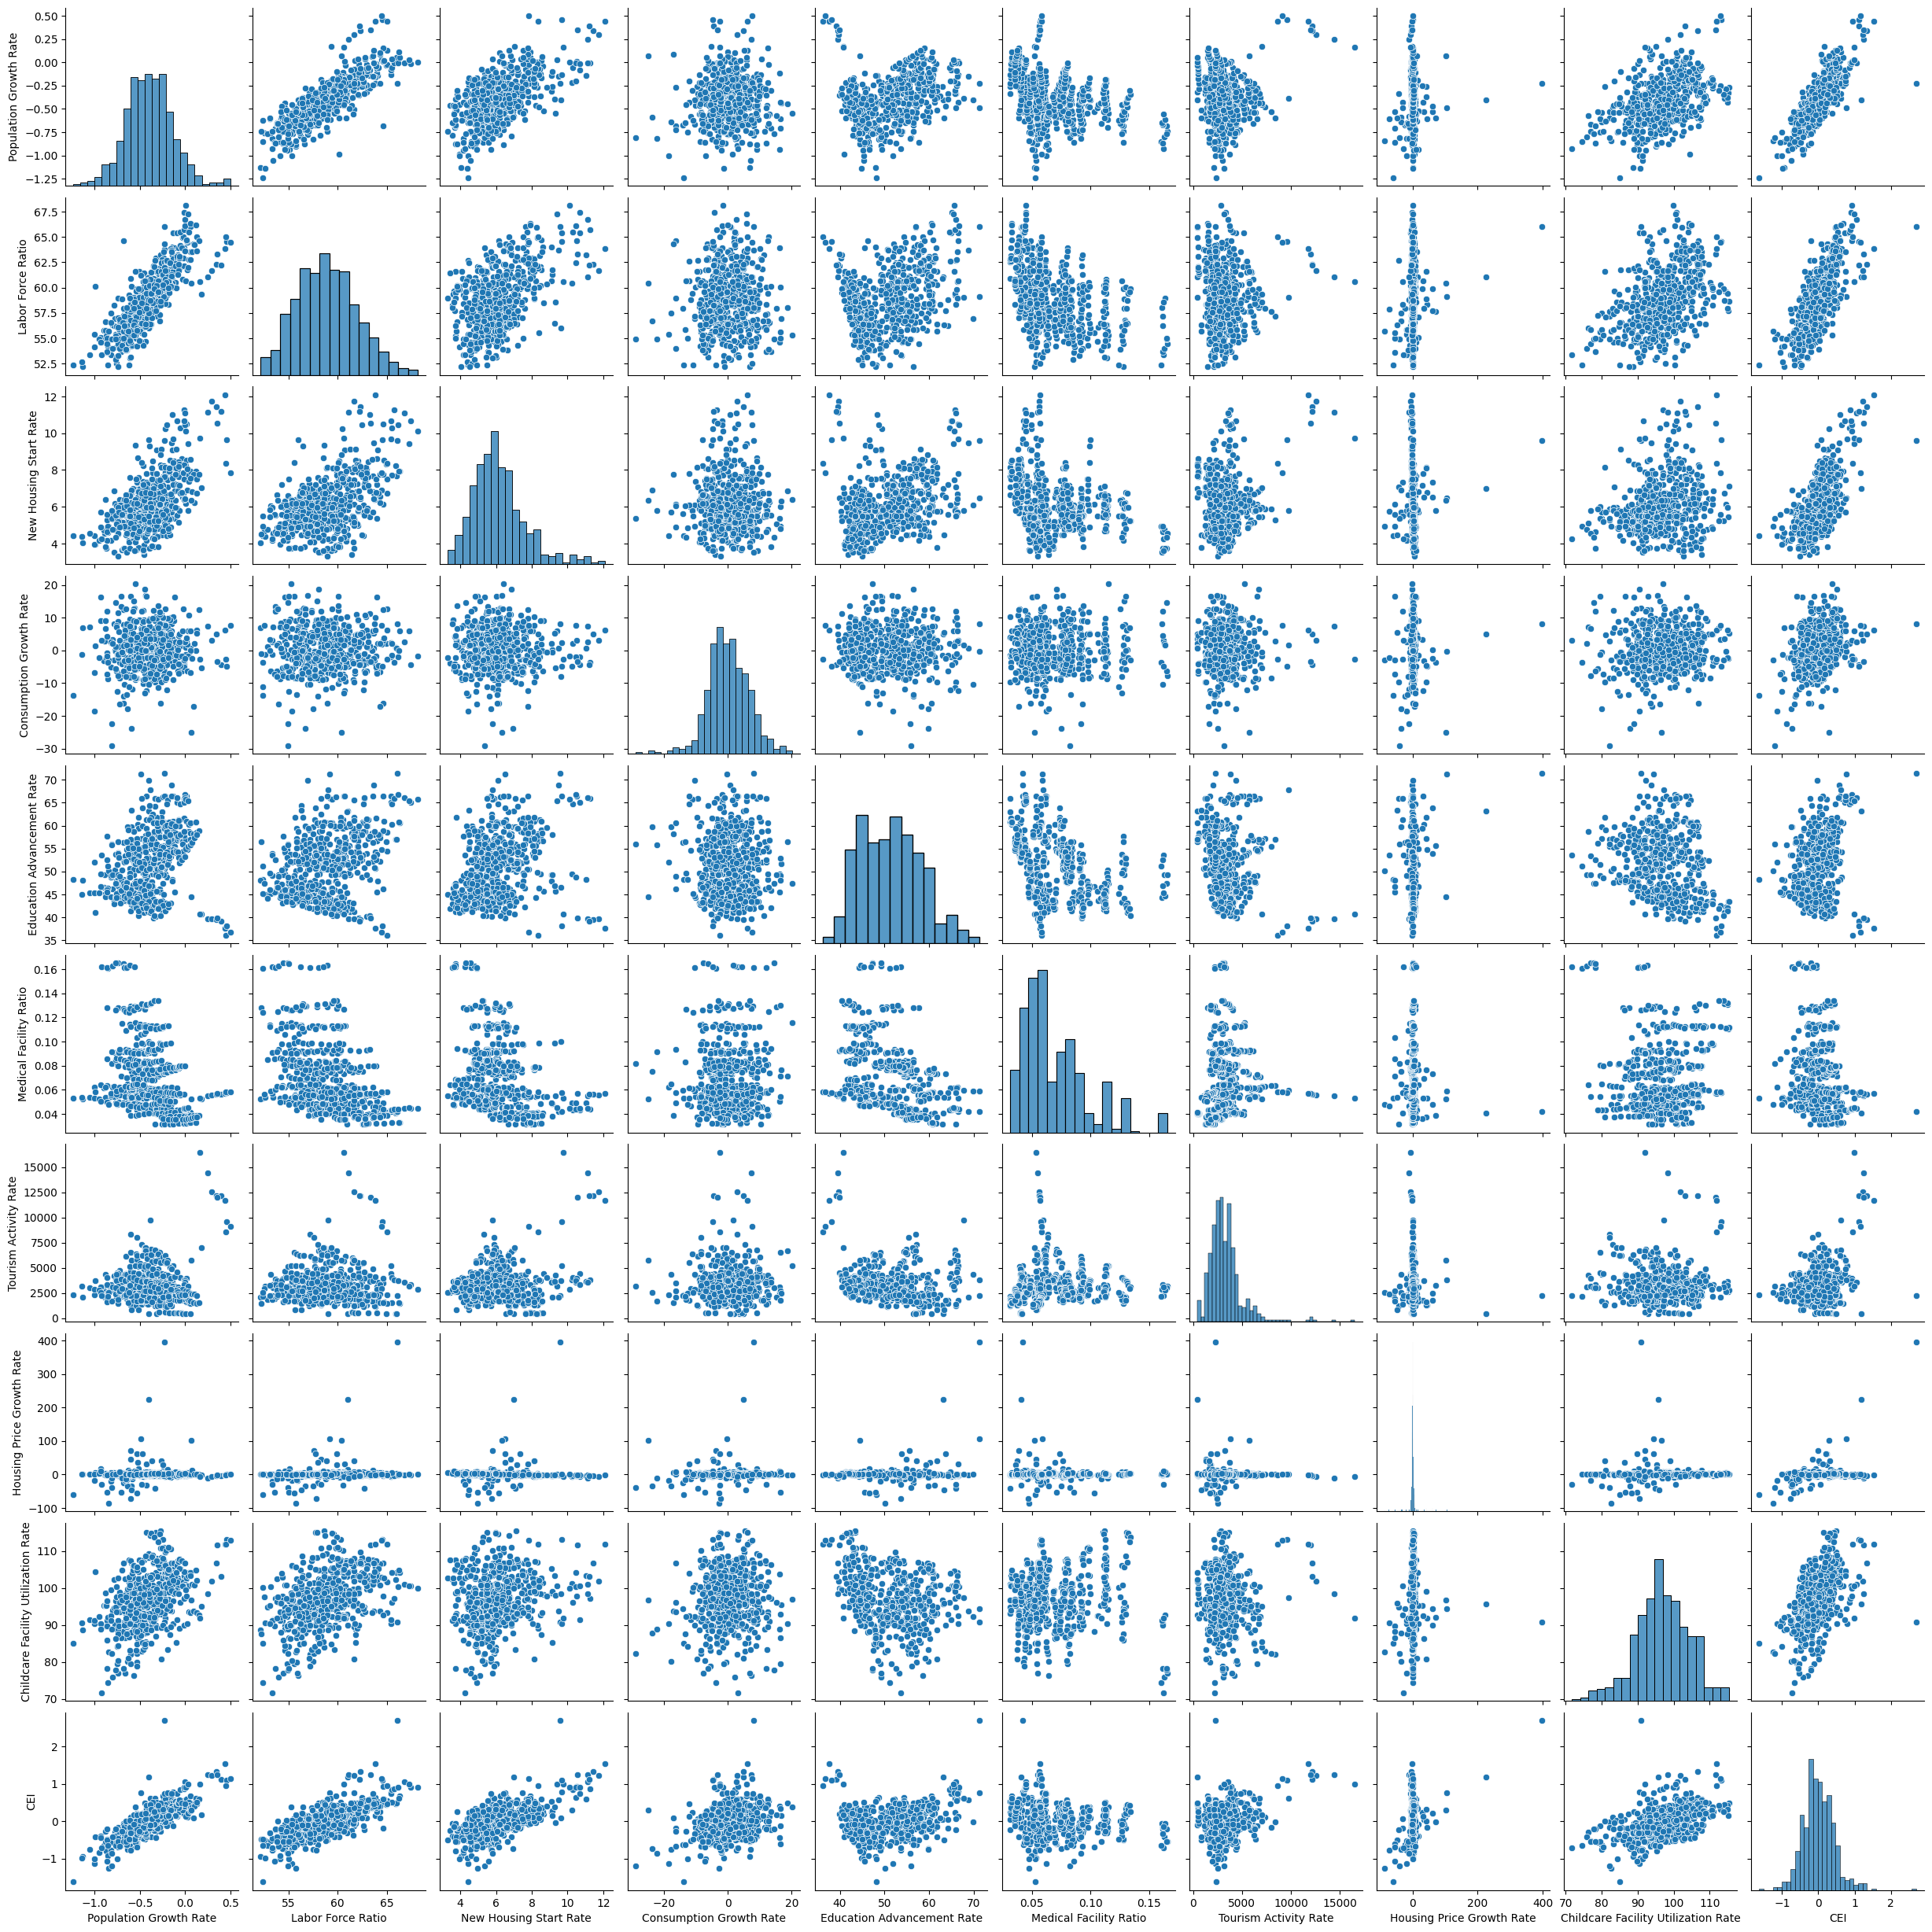

In [19]:
sns.pairplot(Data[indicators_CEI])
plt.show()

In [15]:
# 説明変数 (independent variables)
X = Data[indicators]

# 目的変数 (dependent variable)
y = Data['CEI']

# 定数項を追加
X = sm.add_constant(X)

# 重回帰分析のモデル作成
model = sm.OLS(y, X).fit()

# 結果の表示
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    CEI   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.795e+26
Date:                Wed, 04 Dec 2024   Prob (F-statistic):               0.00
Time:                        06:47:07   Log-Likelihood:                 16009.
No. Observations:                 564   AIC:                        -3.200e+04
Df Residuals:                     554   BIC:                        -3.195e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co